In [ ]:
2#6400 project
#(https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data)

In [ ]:
#VARIABLE CONSTANTS
crime_categories = {
    'homicide': [110, 113],
    'rape': [121, 122, 815, 820, 821],
    'robbery': [210, 220],
    'agg_assault': [230, 231, 235],
    'dv': [236, 250, 251, 761, 926, 626, 627, 647, 763, 928, 930],
    'simple_assault': [435, 436, 437, 622, 623, 624, 625],
    'burglary': [310, 320],
    'mvt': [510, 520, 433],
    'btfv': [330, 331, 410, 420, 421],
    'personal_theft': [350, 351, 352, 353, 450, 451, 452, 453],
    'other_theft': [341, 343, 345, 440, 441, 442, 443, 444, 445,
                    470, 471, 472, 473, 474, 475, 480, 485, 487, 491]
}
crime_columns = ['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4']

In [ ]:
# Part 1: Data Acquisition
import pandas as pd

# Load the dataset
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [ ]:
# Part 2: Data Inspection
#Displaying first few rows of the dataset
print('First few rows of dataset')
display(df.head())

#Displaying data types of each column
print('\n\nColumn/variables and their corresponding data types')
display(df.info())

First few rows of dataset


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350




Column/variables and their corresponding data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57691 entries, 0 to 57690
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DR_NO           57691 non-null  int64  
 1   Date Rptd       57691 non-null  object 
 2   DATE OCC        57691 non-null  object 
 3   TIME OCC        57691 non-null  int64  
 4   AREA            57691 non-null  int64  
 5   AREA NAME       57691 non-null  object 
 6   Rpt Dist No     57691 non-null  int64  
 7   Part 1-2        57691 non-null  int64  
 8   Crm Cd          57691 non-null  int64  
 9   Crm Cd Desc     57691 non-null  object 
 10  Mocodes         49362 non-null  object 
 11  Vict Age        57690 non-null  float64
 12  Vict Sex        49880 non-null  object 
 13  Vict Descent    49880 non-null  object 
 14  Premis Cd       57689 non-null  float64
 15  Premis Desc     57670 non-null  object 
 16  Weapon Used Cd  19908 

None

In [ ]:
# Part 3: Data Cleaning

#Putting everything in proper date time forma
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format = '%m/%d/%Y %I:%M:%S %p')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format = '%m/%d/%Y %I:%M:%S %p')
df['YEAR'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month
df['Weekday'] = df['DATE OCC'].dt.day_name()

#Dropping columns where not planning to do analysis with
df = df.drop(columns=['Weapon Desc', 'Weapon Used Cd', 'Mocodes', 'Cross Street'])

#Remove 2025 Dataset
df = df[df['YEAR'] != 2025]

# Replace '-', 'H' with 'X', and fill NaN values with 'X'
df['Vict Sex'] = df['Vict Sex'].replace(['-', 'H'], 'X').fillna('X')

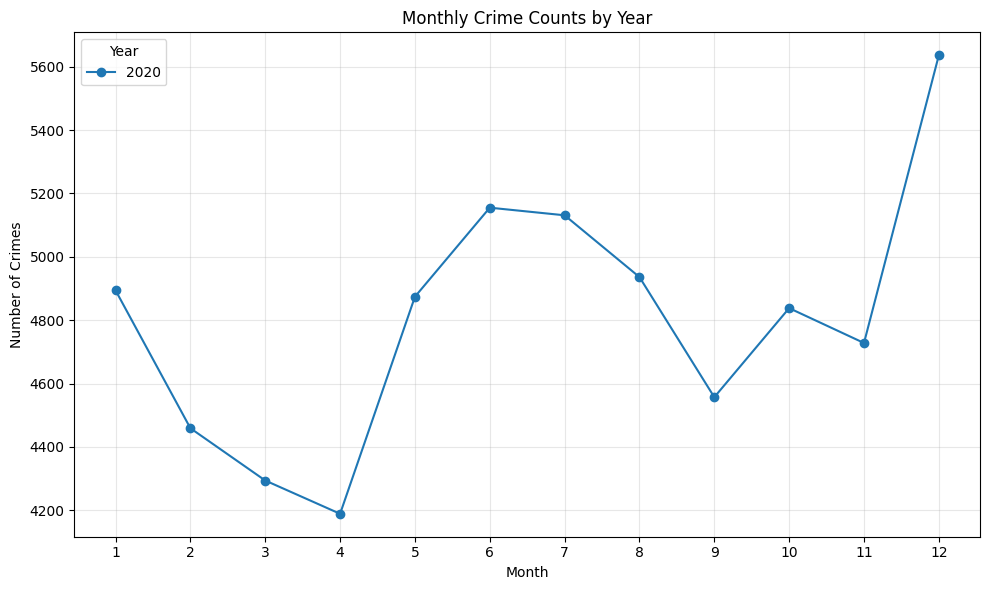

In [ ]:
# Question 1 (Part 2) : Overall Crime Trends: Calculate and plot the total number of crimes per year to visualize the trends
import matplotlib.pyplot as plt

# Group by year and month
df_monthly = df.groupby(['YEAR', 'Month']).size().reset_index(name='Monthly Crimes')

# Pivot for plotting
pivot_df = df_monthly.pivot(index='Month', columns='YEAR', values='Monthly Crimes')

# Plot
plt.figure(figsize=(10, 6))
for year in sorted(pivot_df.columns):
    plt.plot(pivot_df.index, pivot_df[year], marker='o', label=str(year))

plt.title('Monthly Crime Counts by Year')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(1, 13))  # Months 1–12
plt.legend(title='Year')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

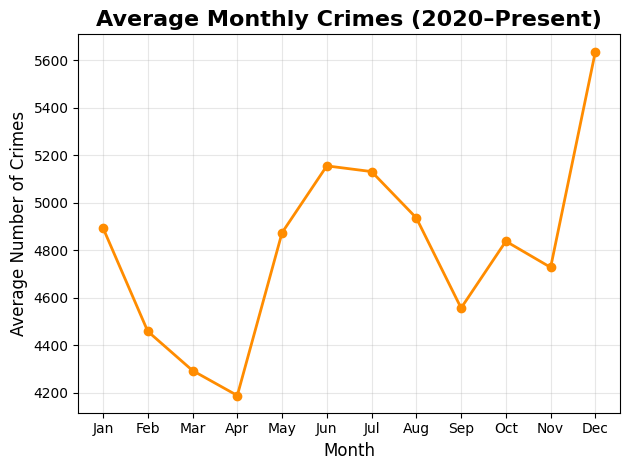

,Month,Total Crimes
0,1,4894.0
1,2,4459.0
2,3,4294.0
3,4,4189.0
4,5,4874.0
5,6,5155.0
6,7,5131.0
7,8,4936.0
8,9,4557.0
9,10,4838.0


In [ ]:
# Question 2: Seasonal Patterns: Group the data by month and analyze the average number of monthly crimes over the years
monthly_counts = df.groupby(['YEAR', 'Month']).size().reset_index(name='Total Crimes')
monthly_avg = monthly_counts.groupby('Month')['Total Crimes'].mean().reset_index()
plt.plot(monthly_avg['Month'], monthly_avg['Total Crimes'], marker='o', color='darkorange', linewidth=2)
plt.title('Average Monthly Crimes (2020–Present)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Number of Crimes', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(range(1, 13),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()
monthly_avg

                Count
btfv             8107
dv               6889
other_theft      6705
mvt              6413
simple_assault   4791
burglary         3952
agg_assault      3152
robbery          2064
rape              527
personal_theft    269
homicide           96


<Axes: title={'center': 'Crime Counts by Category'}>

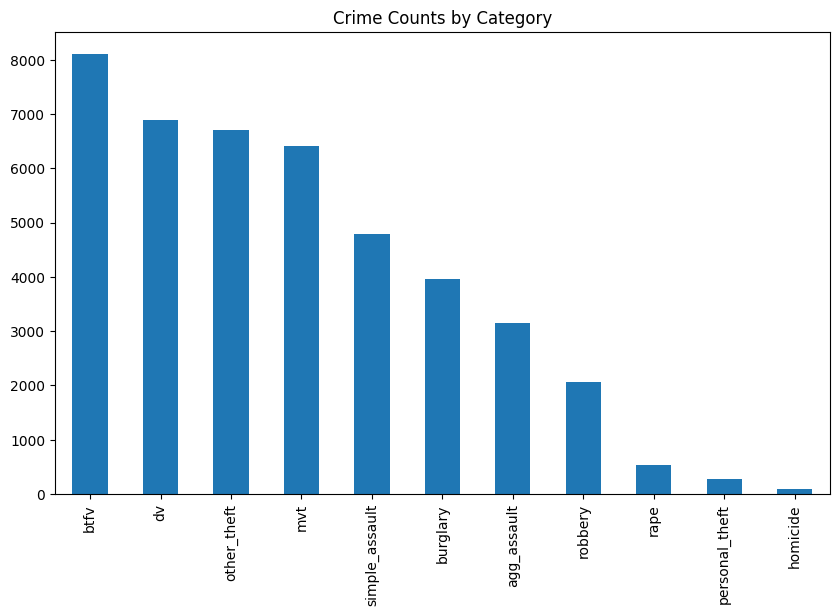

In [ ]:
# Question 3: Most Common Crime Type: Count the occurences of each crime type and identify the one with the highest frequency
# combining all crime columns into a single series of all codes
all_codes = pd.concat([df[col] for col in crime_columns])

# count for each category
crime_counts = {cat: all_codes.isin(codes).sum() for cat, codes in crime_categories.items()}

# Show crime counts per category
crime_counts_df = pd.DataFrame.from_dict(crime_counts, orient='index', columns=['Count']).sort_values('Count', ascending=False)
print(crime_counts_df)

crime_counts_df.plot(kind='bar', figsize=(10,6), legend=False, title='Crime Counts by Category')

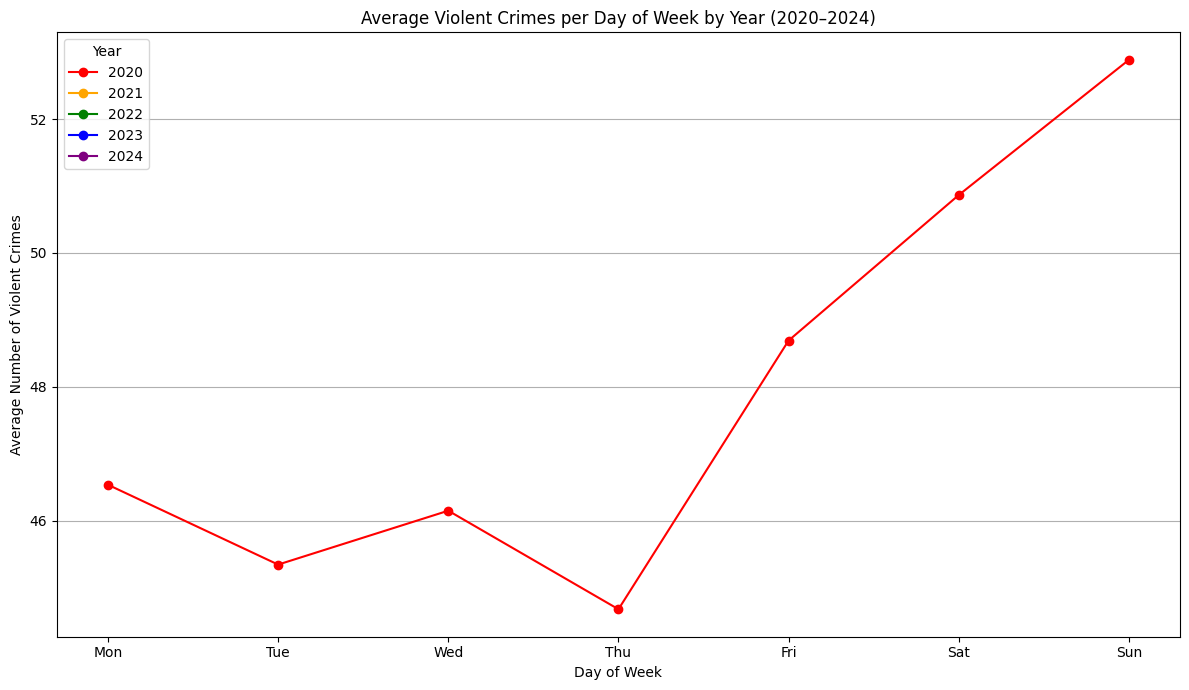

In [ ]:
#VIOLENT CRIMES
# Combine all violent crime codes (assuming crime_categories and crime_columns are defined)
violent_crime_codes = (
    crime_categories['homicide'] +
    crime_categories['rape'] +
    crime_categories['robbery'] +
    crime_categories['agg_assault'] +
    crime_categories['dv'] +
    crime_categories['simple_assault']
)

# Melt DataFrame to long format
melted = df.melt(id_vars=['DATE OCC'], value_vars=crime_columns, var_name='CrimeCodeCol', value_name='CrimeCode')

# Filter for valid violent crime codes
melted = melted[melted['CrimeCode'].isin(violent_crime_codes)]

# Extract year and day of week
melted['Year'] = melted['DATE OCC'].dt.year
melted['DayOfWeek'] = melted['DATE OCC'].dt.dayofweek

# Filter for years 2020-2024
melted = melted[melted['Year'].between(2020, 2024)]

# Group by Year and DayOfWeek, count violent crimes per day
violent_daily = melted.groupby(['Year', 'DATE OCC']).size().reset_index(name='ViolentCrimeCount')

# Now average violent crimes by Year and DayOfWeek
violent_daily['DayOfWeek'] = violent_daily['DATE OCC'].dt.dayofweek
avg_by_day_year = violent_daily.groupby(['Year', 'DayOfWeek'])['ViolentCrimeCount'].mean().reset_index()

# Map day numbers to names
day_name_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
avg_by_day_year['Day'] = avg_by_day_year['DayOfWeek'].map(day_name_map)

# Sort days for plotting
avg_by_day_year = avg_by_day_year.sort_values('DayOfWeek')

# Plotting
plt.figure(figsize=(12,7))
colors = ['red', 'orange', 'green', 'blue', 'purple']
for i, year in enumerate(range(2020, 2025)):
    subset = avg_by_day_year[avg_by_day_year['Year'] == year]
    plt.plot(subset['Day'], subset['ViolentCrimeCount'], marker='o', label=str(year), color=colors[i])

plt.title('Average Violent Crimes per Day of Week by Year (2020–2024)')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Violent Crimes')
plt.legend(title='Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

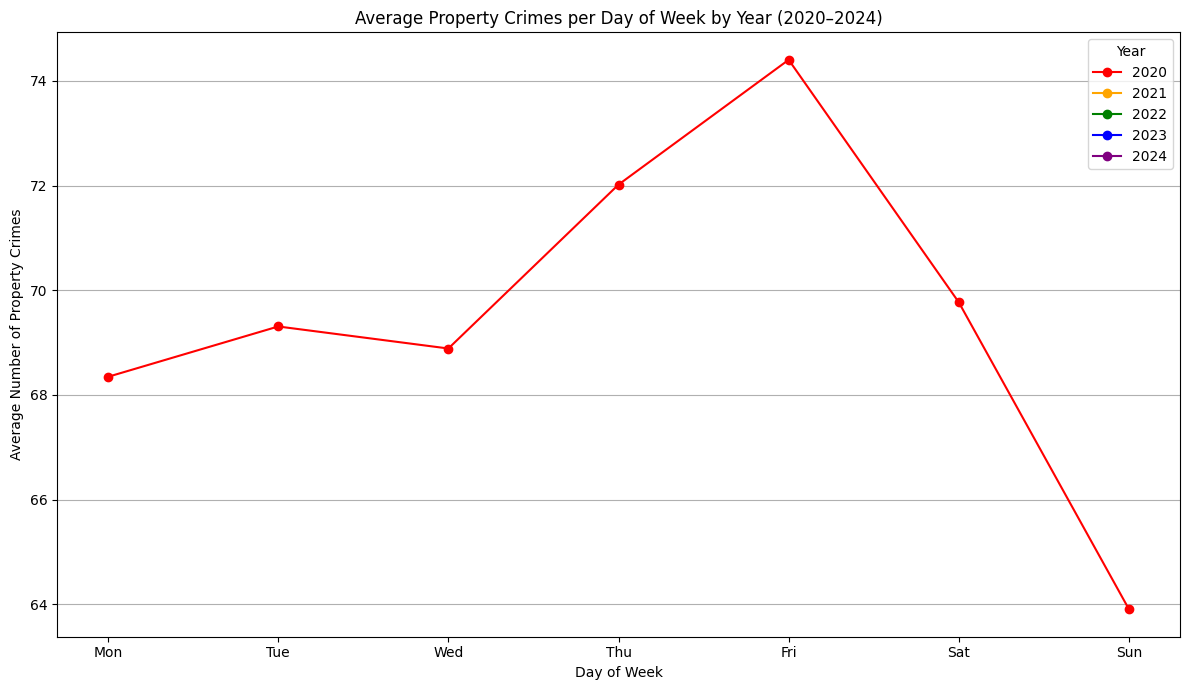

In [ ]:
# PROPERTY CRIMES
property_crime_codes = (
    crime_categories['burglary'] +
    crime_categories['mvt'] +
    crime_categories['btfv'] +
    crime_categories['personal_theft'] +
    crime_categories['other_theft']
)

# Melt DataFrame to long format
melted = df.melt(id_vars=['DATE OCC'], value_vars=crime_columns, var_name='CrimeCodeCol', value_name='CrimeCode')

# Filter for valid violent crime codes
melted = melted[melted['CrimeCode'].isin(property_crime_codes)]

# Extract year and day of week
melted['Year'] = melted['DATE OCC'].dt.year
melted['DayOfWeek'] = melted['DATE OCC'].dt.dayofweek

# Filter for years 2020-2024
melted = melted[melted['Year'].between(2020, 2024)]

# Group by Year and DayOfWeek, count violent crimes per day
property_daily = melted.groupby(['Year', 'DATE OCC']).size().reset_index(name='PropertyCrimeCount')

# Now average violent crimes by Year and DayOfWeek
property_daily['DayOfWeek'] = property_daily['DATE OCC'].dt.dayofweek
avg_by_day_year = property_daily.groupby(['Year', 'DayOfWeek'])['PropertyCrimeCount'].mean().reset_index()

# Map day numbers to names
day_name_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
avg_by_day_year['Day'] = avg_by_day_year['DayOfWeek'].map(day_name_map)

# Sort days for plotting
avg_by_day_year = avg_by_day_year.sort_values('DayOfWeek')

# Plotting
plt.figure(figsize=(12,7))
colors = ['red', 'orange', 'green', 'blue', 'purple']
for i, year in enumerate(range(2020, 2025)):
    subset = avg_by_day_year[avg_by_day_year['Year'] == year]
    plt.plot(subset['Day'], subset['PropertyCrimeCount'], marker='o', label=str(year), color=colors[i])

plt.title('Average Property Crimes per Day of Week by Year (2020–2024)')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Property Crimes')
plt.legend(title='Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

AREA NAME
Pacific        7735
Southeast      7286
N Hollywood    6874
Olympic        6456
Mission        5805
Topanga        5426
Devonshire     5407
Foothill       4819
Newton         4644
77th Street     418
West LA         359
Wilshire        306
Hollywood       284
Southwest       280
West Valley     278
Van Nuys        264
Central         245
Northeast       229
Rampart         219
Harbor          210
Hollenbeck      147
Name: count, dtype: int64


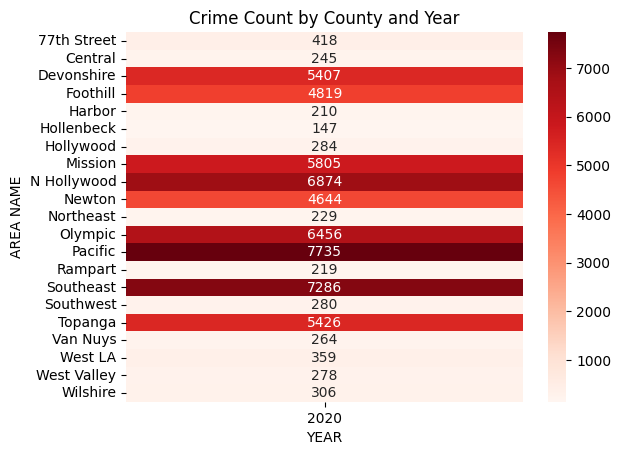

In [ ]:
# Question 4
print(df['AREA NAME'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

df_grouped = df.groupby(['YEAR', 'AREA NAME']).size().reset_index(name='Crime_Count')
heat_data = df_grouped.pivot(index='AREA NAME', columns='YEAR', values='Crime_Count')
sns.heatmap(heat_data, cmap='Reds', annot=True, fmt='.0f')
plt.title('Crime Count by County and Year')
plt.show()


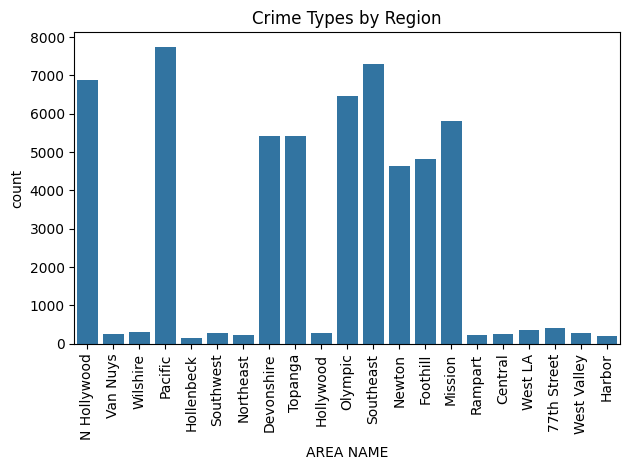

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='AREA NAME')
plt.xticks(rotation=90)
plt.title('Crime Types by Region')
plt.tight_layout()
plt.show()

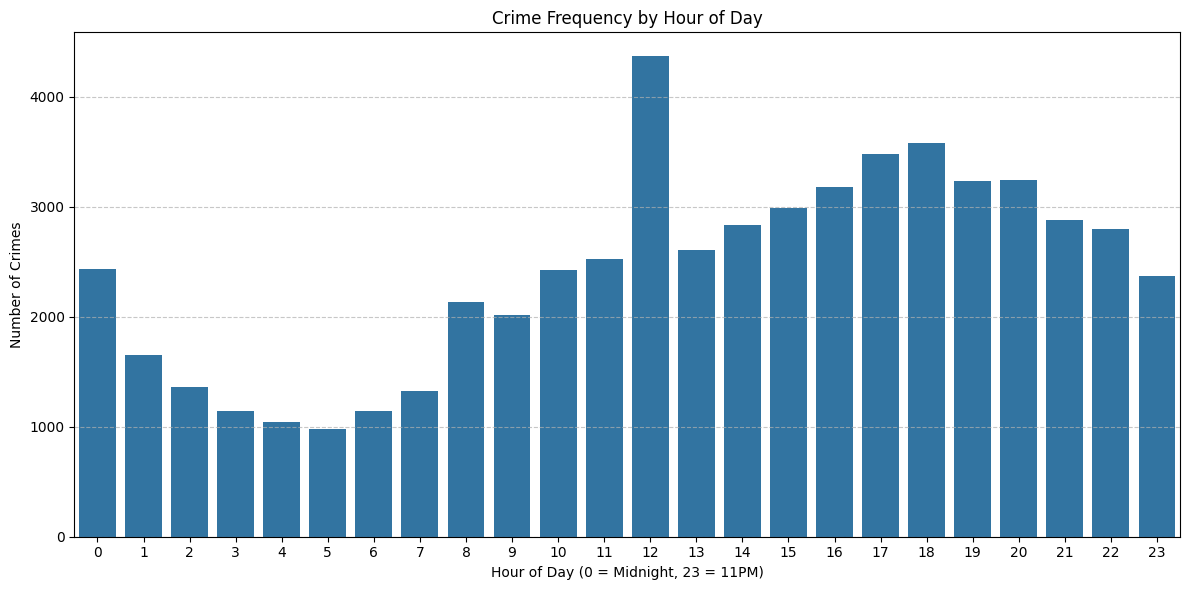

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
# Convert 'TIME OCC' to hour
df['HOUR'] = df['TIME OCC'].apply(lambda x: int(str(x).zfill(4)[:2]))

# Count number of crimes per hour
crime_by_hour = df['HOUR'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=crime_by_hour.index, y=crime_by_hour.values)

plt.title('Crime Frequency by Hour of Day')
plt.xlabel('Hour of Day (0 = Midnight, 23 = 11PM)')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


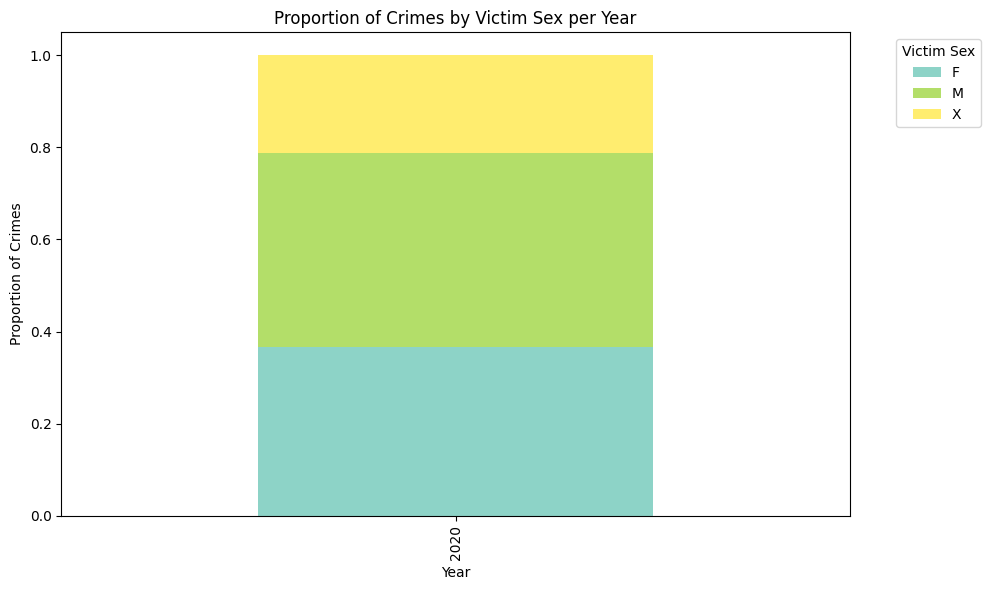

In [ ]:
# Calculate total counts per year
year_totals = df.groupby('YEAR').size()

# Calculate percentage of each Victim Sex per year
year_sex_pct = df.groupby(['YEAR', 'Vict Sex']).size().div(year_totals, level='YEAR').reset_index(name='Percentage')

# Pivot the data to wide format for stacking
pivot_df = year_sex_pct.pivot(index='YEAR', columns='Vict Sex', values='Percentage').fillna(0)

# Plot as stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set3')

plt.title('Proportion of Crimes by Victim Sex per Year')
plt.ylabel('Proportion of Crimes')
plt.xlabel('Year')
plt.legend(title='Victim Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1938059478.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_crime = daily_crime.resample('M').sum().reset_index()
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc5xxlkew/hnmen1uo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc5xxlkew/2a9wvels.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17968', 'data', 'file=/tmp/tmpc5xxlkew/hnmen1uo.json', 'init=/tmp/tmpc5xxlkew/2a9wvels.json', 'output', 'file=/tmp/tmpc5xxlkew/prophet_modelf0yju2dp/prophet_model-20251015202613.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:26:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:26:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmds

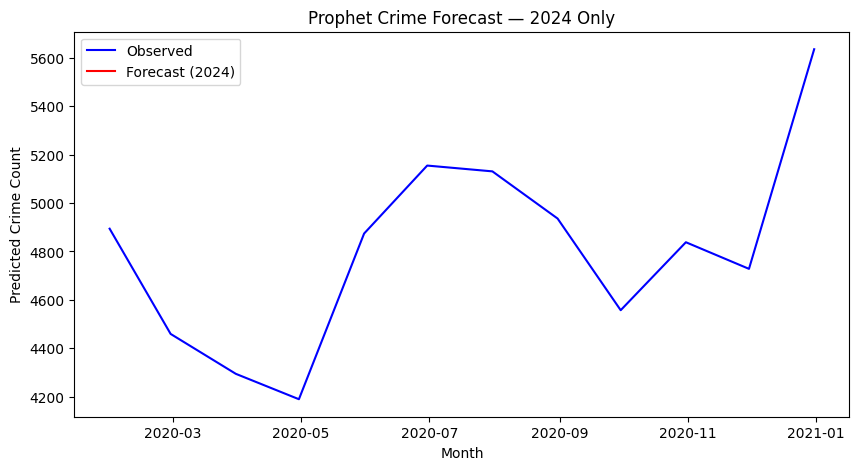

In [ ]:
from prophet import Prophet

df_predict = df[df['YEAR'] != 2024]

df_predict = df_predict.sort_values('DATE OCC')
daily_crime = df.groupby('DATE OCC').size().rename('Crime_Count')

# Resample monthly
monthly_crime = daily_crime.resample('M').sum().reset_index()

# Prophet format
crime_data = monthly_crime.rename(columns={'DATE OCC': 'ds', 'Crime_Count': 'y'})
model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)

# Fit
model.fit(crime_data)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Extract only 2024
forecast_2024 = forecast[forecast['ds'].dt.year == 2024]

plt.figure(figsize=(10,5))
plt.plot(crime_data['ds'], crime_data['y'], label='Observed', color='blue')
plt.plot(forecast_2024['ds'], forecast_2024['yhat'], label='Forecast (2024)', color='red')
plt.fill_between(forecast_2024['ds'],
                 forecast_2024['yhat_lower'],
                 forecast_2024['yhat_upper'],
                 color='red', alpha=0.2)
plt.title('Prophet Crime Forecast — 2024 Only')
plt.xlabel('Month')
plt.ylabel('Predicted Crime Count')
plt.legend()
plt.show()

/tmp/ipython-input-541072914.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_hour = df.groupby(['Weekday', 'HOUR']).size().reset_index(name='Count')


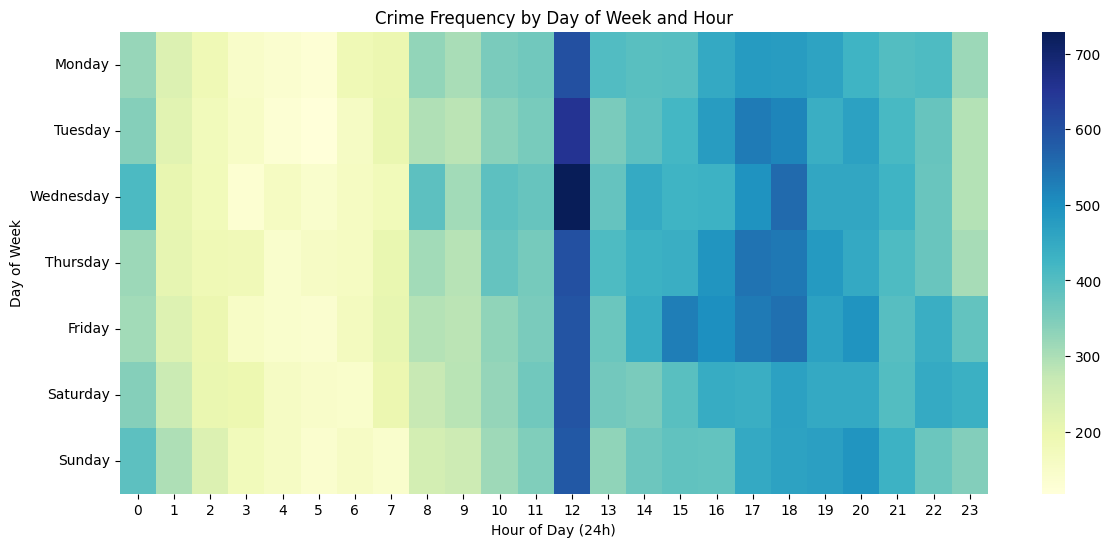

In [ ]:
# Convert DATE OCC to datetime
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Extract weekday and hour
df['Weekday'] = df['DATE OCC'].dt.day_name()
df['HOUR'] = df['TIME OCC'] // 100

# Order weekdays
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekdays_order, ordered=True)

# Group and pivot
weekday_hour = df.groupby(['Weekday', 'HOUR']).size().reset_index(name='Count')
pivot = weekday_hour.pivot(index='Weekday', columns='HOUR', values='Count')

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Crime Frequency by Day of Week and Hour")
plt.xlabel("Hour of Day (24h)")
plt.ylabel("Day of Week")
plt.show()
